## 3. Are genes that are DE in the mutant compared to the background involved in growth? 

We clustered the genes that are DE in time in the backrgound strain Pad4 and looked for functional enrichment in these clusters. We compared the genes that are differentially expressed in the mutant compared to this background and found that in general, the expression level of these genes is lower than in the background. 

Because we also observe a growth phenotype in the mutant, we now want to w=know whether the genes that are differentially expressed in the mutant compared to the background are involved in growth. For this, we determine whether the DE egenes are enriched for putative targets of key growth-regulators, specifically PIF4, but also BZR1 and ARF6.

In [36]:
# Assume notebook is in [workingdir]/notebooks and data is in [workingdir]/data. 
# Results will be stored in [workingdir]/results

import os
if os.getcwd().split('/')[-1] == 'notebooks': 
    os.chdir('..') # move one directory up to [workingdir]
    
workingdir = os.getcwd()

print('Assuming data is stored in '+workingdir+'/data/, results will be stored in '+workingdir+'/results/')
os.system('mkdir -p results')
outdirname = 'results/scatterplots/'
os.system('mkdir -p '+outdirname)



# General stuff:
# imports
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_unweighted

import pickle
from scipy import stats
import utils

strains = ['pad4', 'siz1-2_pad4', '1xB_pad4']
muts    = strains[1:]
BKGR    = strains[0]
timepoints  = ['T0','T1','T2']


Assuming data is stored in /Users/like/Dropbox/00.Projects/Like_Harrold/repository/data/, results will be stored in /Users/like/Dropbox/00.Projects/Like_Harrold/repository/results/


First we load the sets of putative targets of the three TFs and compare them:

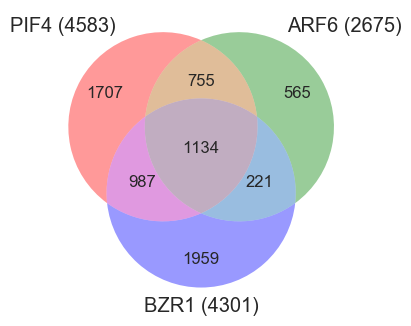

In [48]:
subset2color = {'PIF4': 'red', 'ARF6':'green', 'BZR1':'blue'}

TFname_list = ['PIF4', 'ARF6', 'BZR1']
subset_list = []
label_list  = []
color_list  = []
for subset_name in TFname_list:
    #copy-pasted from excel files, hence the split by '\r'
    subset = set([x.strip() for x in open('gene_lists/'+subset_name+'.txt').read().upper().split('\r')]) 
    
    subset_size = len(subset)
    subset_list.append(subset)
    color_list.append(subset2color[subset_name])
    label_list.append(subset_name+' ('+str(subset_size)+')')
    
plt.figure(figsize=(4,4))
venn = venn3_unweighted(subset_list, set_labels = label_list, set_colors = color_list)

    
plt.show()

### What is the overlap of targets of these 3 transcription fators with genes that are differentially expressed in the mutants compared to the background at different timepoints?


In [30]:
# pickled in 2.scatterplot_DEGs_mutant_vs_bkgr
transcript2probe = pickle.load(open('util/pickles/transcript2probes.pickled'))
all_probes       = pickle.load(open('util/pickles/all_probes_set.pickled'))

PIF4 4583 genes, 4403 probes
ARF6 2675 genes, 2546 probes
BZR1 4301 genes, 4170 probes


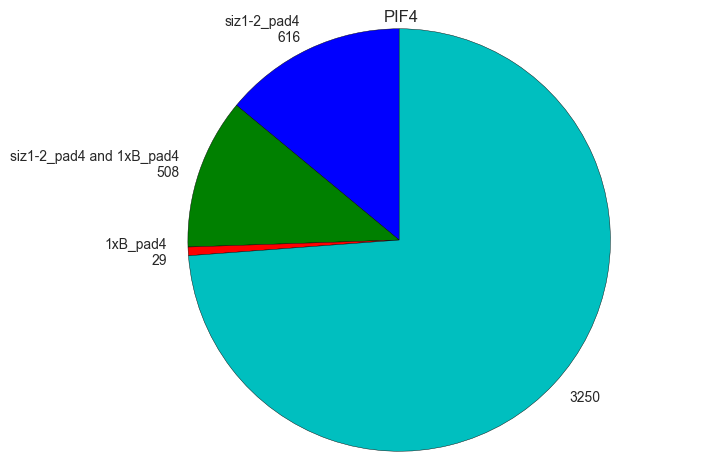

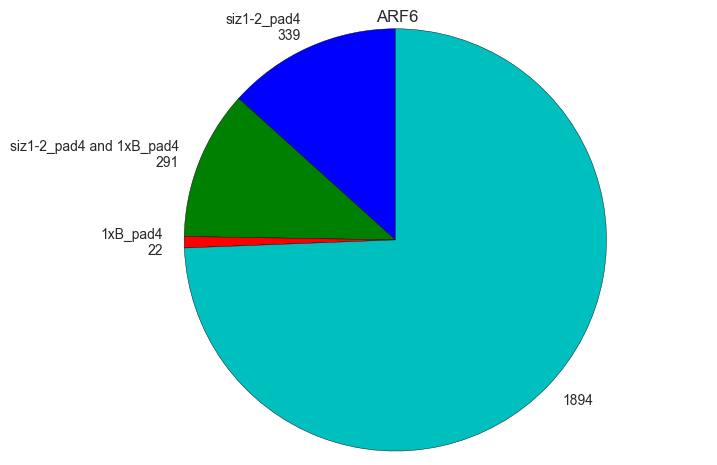

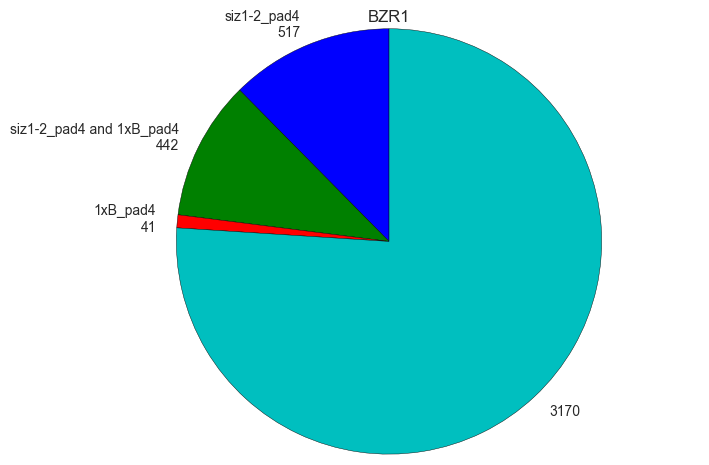

In [49]:
probesets_TFtargets = []
labels = []

for index, name_selection in enumerate(TFname_list):
    # get selected transcripts (e.g. TF targets)
    subset = set([utils.homogenize_geneID(x) for x in open('gene_lists/'+name_selection+'.txt', 'U')])   
    #convert these geneIDs to probeids
    subset_probes = set([])
    Nunknown = 0
    for transcript_id in subset:
        if transcript2probe.has_key(transcript_id):
            subset_probes.add(transcript2probe[transcript_id]) 
    print name_selection, len(subset), 'genes,', len(subset_probes),'probes'
    labels.append(name_selection+'\n'+str(len(subset_probes)))
    
    probesets_TFtargets.append(subset_probes)
    
mut2DEGs = {}
for mut in muts:      
    # collect all probes that are a DEG when comparing the mutant to the background
    #for all timepoints
    DEG_probes = set([])
    for T in timepoints:
        DEG_probes = DEG_probes.union(pickle.load(open('util/pickles/'\
                                                       +T+'_'+BKGR+'_vs_'+mut+'.DEGs_q0.01.probes_as_set')))
    
    mut2DEGs[mut] = DEG_probes


for TFidx, TFprobeset in enumerate(probesets_TFtargets):
    TFname = TFname_list[TFidx]
    sizes = []
    
    # number of DEGs in mut 1 that are also a TF target, and not a DEG in mut2
    sizes.append(len((mut2DEGs[muts[0]].intersection(TFprobeset)).difference(mut2DEGs[muts[1]]))) 
       
    # number of DEGs in both muts that are also a TF target
    sizes.append(len((mut2DEGs[muts[1]].intersection(TFprobeset)).intersection(mut2DEGs[muts[0]]))) 
    
    # number of DEGs in mut 2 that are also a TF target, and not a DEG in mut1
    sizes.append(len((mut2DEGs[muts[1]].intersection(TFprobeset)).difference(mut2DEGs[muts[0]])))
    
    #number of TF targets that are not a DEG in any of the two muts
    sizes.append(len((TFprobeset.difference(mut2DEGs[muts[0]])).difference(mut2DEGs[muts[1]])))
    
    
    fig1, ax1 = plt.subplots()
    labels = [muts[0]+'\n'+str(sizes[0]), muts[0]+' and '+muts[1]+'\n'+str(sizes[1]), muts[1]+'\n'+str(sizes[2]), str(sizes[3])]
    
    ax1.pie(sizes, labels=labels, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(TFname)
    plt.savefig('results/'+TFname+'_PIE_overlapDEGs.svg')
    plt.show()
    

About 25% of TF targets are differentially expressed in _siz1 pad4_ or _sumo1/2KD pad4_. Very few DEGs that overlap with TF targets are specific to _sumo1/2KD pad4_, as can be expected because this mutants shares many DEGs with _siz1 pad4_.  
  
  
___
These Pie-charts are in Figure 5E
___   
  
  

#### Are some TF targets overrepresented (or targets of multiple TFs)?

* 5627 DEGs in all timepoints for siz1-2_pad4
PIF4 4403 1124
ARF6 2546 630
BZR1 4170 959


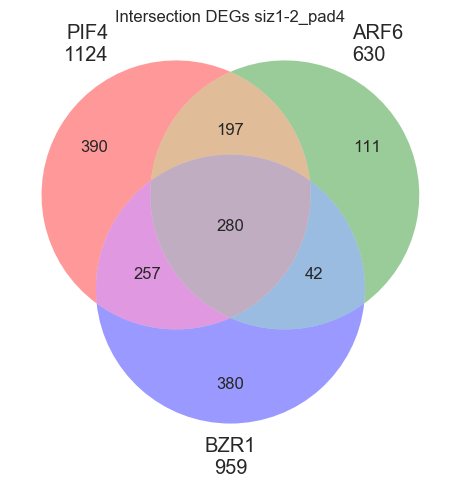

* 2901 DEGs in all timepoints for 1xB_pad4
PIF4 4403 537
ARF6 2546 313
BZR1 4170 483


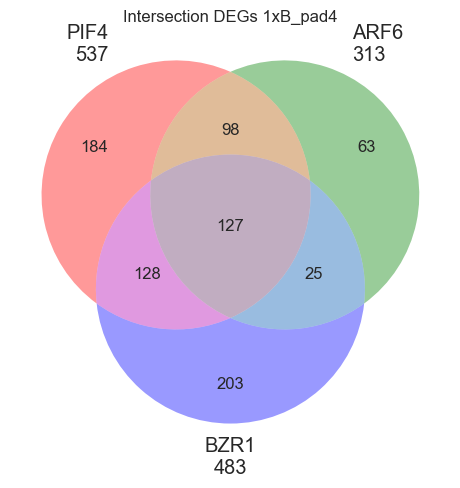

In [50]:

for mut in muts:
    # collect all probes that are a DEG when comparing the mutant to the background
    #for all timepoints
    DEG_probes = set([])
    for T in timepoints:
        DEG_probes = DEG_probes.union(pickle.load(open('util/pickles/'\
                                                       +T+'_'+BKGR+'_vs_'+mut+'.DEGs_q0.01.probes_as_set')))
    print '*',len(DEG_probes), 'DEGs in all timepoints for', mut

    intersected_probesets = []
    labels = []
    for TFidx, TFprobeset in enumerate(probesets_TFtargets):
        labels.append(TFname_list[TFidx]+'\n'+str(len(TFprobeset.intersection(DEG_probes))))
        print TFname_list[TFidx], len(TFprobeset), len(TFprobeset.intersection(DEG_probes))
        intersected_probesets.append(TFprobeset.intersection(DEG_probes))
     

    name = 'Intersection DEGs '+mut
    plt.figure()
    venn = venn3_unweighted(intersected_probesets, set_labels = labels)
    plt.title(name)
    plt.savefig('results/Venn_diagram/VENN_'+name.replace(' ', '-')+'.eps')
    plt.show()
  

  
___
These Venn diagrams are in Figure 5F and 5G
___

  
  
### Are TF targets overrepresented among DEGs?

In [53]:
import glob
import numpy as np

dirnameStrains = 'data/reanalysisStrains/'

# lists with TF targets
gene_lists = ['PIF4', 'BZR1', 'ARF6', 'HY5', 'SAUR']
color_list = ['#B22222', '#1E90FF', '#228B22', '#9400D3', '#FFD700']

# To calculate whether overlapis significant, we need to know the total number of genes/probes tested
print 'Reference set of probes on microarray:', len(all_probes)
refset_ChIPRNAexp = set([])
Nunknown = 0
for transcript_id in [utils.homogenize_geneID(x) for x in open('gene_lists/TAIR9_representative_gene_model.txt').readlines()[5:]]:
    if transcript2probe.has_key(transcript_id):
        refset_ChIPRNAexp.add(transcript2probe[transcript_id])
    else:
        Nunknown += 1
print 'Reference set of probes in ChIP and RNA seq experiments (TAIR9):', len(refset_ChIPRNAexp)

REFSET_PROBES = all_probes.intersection(refset_ChIPRNAexp)
print 'Reference set of probes in ChIP and RNA seq experiments (TAIR9) AND microarray:', len(REFSET_PROBES)
print '\n\n\n'


for S in strains[1:]:
    print '**************'
    print '*'
    print '*\t',S
    print '*'
    print '**************\n'
    # get all probes that are a DEG at some timepoint:
    probes_allT = set([])
    for T in timepoints:
        probesT = pickle.load(open('util/pickles/'+T+'_'+BKGR+'_vs_'+S+'.DEGs_q0.01.probes_as_set'))
        probes_allT = probes_allT.union(probesT)
        

    for subset_name in gene_lists:
        
        print '*', subset_name
       
        #copy-pasted from excel files, hence the 'U'
        subset = set([utils.homogenize_geneID(x) for x in open('gene_lists/'+subset_name+'.txt', 'U')])
        
        #convert these geneIDs to probeids
        subset_probes = set([])
        Nunknown = 0
        for transcript_id in subset:
            if transcript2probe.has_key(transcript_id):
                subset_probes.add(transcript2probe[transcript_id])
            else:
                #print 'no probe for transcript:', transcript_id
                Nunknown += 1
                
        print Nunknown, 'unknown transcripts,',len(subset_probes), 'probes' 
        
        # The hypergeometric distribution models drawing objects from a bin. 
        # M is the total number of objects, n is total number of Type I objects. 
        # The random variate represents the number of Type I objects in N drawn without replacement from the total population.
        M = len(REFSET_PROBES) # all genes
        n = len(probes_allT.intersection(REFSET_PROBES)) # all DEGs
        N = len(subset_probes) # TF target
        x = len(subset_probes.intersection(probes_allT)) # TF target and DEG
        print 'TESTING FOR ENRICHMENT'
        print subset_name, x, 'out of', N, 'are a DEG:', stats.hypergeom.sf(x, M, n, N)
        print 'Contigency:'
        
        print '        \ttarget\t no target\t total'
        print 'DEG     \t'+str(x)+'\t'+str(n-x)+'\t'+str(n)
        print 'no DEG  \t'+str(N-x)+'\t'+str((M-n)-(N-x))+'\t'+str(M-n)
        print 'Total   \t'+str(N)+'\t'+str(M-N)+'\t'+str(M)
        print '\n\n'
    
        
          
        

      
    

Reference set of probes on microarray: 28403
Reference set of probes in ChIP and RNA seq experiments (TAIR9): 26859
Reference set of probes in ChIP and RNA seq experiments (TAIR9) AND microarray: 26859




**************
*
*	siz1-2_pad4
*
**************

* PIF4
87 unknown transcripts, 4403 probes
TESTING FOR ENRICHMENT
PIF4 1124 out of 4403 are a DEG: 3.071394909e-24
Contigency:
        	target	 no target	 total
DEG     	1124	4208	5332
no DEG  	3279	18248	21527
Total   	4403	22456	26859



* BZR1
71 unknown transcripts, 4170 probes
TESTING FOR ENRICHMENT
BZR1 959 out of 4170 are a DEG: 2.11310365671e-08
Contigency:
        	target	 no target	 total
DEG     	959	4373	5332
no DEG  	3211	18316	21527
Total   	4170	22689	26859



* ARF6
71 unknown transcripts, 2546 probes
TESTING FOR ENRICHMENT
ARF6 630 out of 2546 are a DEG: 9.23870819838e-11
Contigency:
        	target	 no target	 total
DEG     	630	4702	5332
no DEG  	1916	19611	21527
Total   	2546	24313	26859



* HY5
107 unknown transcr

We find significant enrichment for targets of transcription factors that regulate growth:
#### CONTINGENCY TABLES AND P-VALUES

**************

	siz1-2_pad4

**************


* PIF4

87 unknown transcripts, 4403 probes  
TESTING FOR ENRICHMENT

PIF4 1124 out of 4403 are a DEG: 3.071394909e-24


|        	| TF target 	| no TF target 	| Total 	|
|--------	|-----------	|--------------	|-------	|
| DEG    	| 1124      	| 4208         	| 5332  	|
| no DEG 	| 3279      	| 18249        	| 21527 	|
| Total  	| 4403      	| 22456        	| 26859 	|




* ARF6

71 unknown transcripts, 2546 probes  
TESTING FOR ENRICHMENT

ARF6 630 out of 2546 are a DEG: 9.23870819838e-11

|        	| TF target 	| no TF target 	| Total 	|
|--------	|-----------	|--------------	|-------	|
| DEG    	| 630       	| 4702         	| 5332  	|
| no DEG 	| 1916      	| 19611        	| 21527 	|
| Total  	| 2546      	| 24313        	| 26859 	|

    


* BZR1

71 unknown transcripts, 4170 probes  
TESTING FOR ENRICHMENT

BZR1 959 out of 4170 are a DEG: 2.11310365671e-08


|        	| TF target 	| no TF target 	| Total 	|
|--------	|-----------	|--------------	|-------	|
| DEG    	| 959       	| 4373         	| 5332  	|
| no DEG 	| 3211      	| 18316        	| 21527 	|
| Total  	| 4170      	| 22689        	| 26859 	|





**************

	1xB_pad4

**************

* PIF4

87 unknown transcripts, 4403 probes  
TESTING FOR ENRICHMENT

PIF4 537 out of 4403 are a DEG: 1.17305695121e-06

|        	| TF target 	| no TF target 	| Total 	|
|--------	|-----------	|--------------	|-------	|
| DEG    	| 537       	| 2202         	| 2739  	|
| no DEG 	| 3866      	| 20254        	| 24120 	|
| Total  	| 4403      	| 22456        	| 26859 	|


* ARF6

71 unknown transcripts, 2546 probes  
TESTING FOR ENRICHMENT

ARF6 313 out of 2546 are a DEG: 0.000146379678614

|        	| TF target 	| no TF target 	| Total 	|
|--------	|-----------	|--------------	|-------	|
| DEG    	| 313       	| 2426         	| 2739  	|
| no DEG 	| 2233      	| 21887        	| 24120 	|
| Total  	| 2546      	| 24313        	| 26859 	|


* BZR1

71 unknown transcripts, 4170 probes  
TESTING FOR ENRICHMENT

BZR1 483 out of 4170 are a DEG: 0.000691861349122

|        	| TF target 	| no TF target 	| Total 	|
|--------	|-----------	|--------------	|-------	|
| DEG    	| 483       	| 2256         	| 2739  	|
| no DEG 	| 3687      	| 20443        	| 24120 	|
| Total  	| 4170      	| 22689        	| 26859 	|




